<a href="https://www.kaggle.com/code/jimschacko/churn-modelling-using-ann?scriptVersionId=135064240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(tf.__version__)

2.12.0


In [4]:
dataset = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [9]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
geography = pd.get_dummies(x['Geography'], drop_first = True)

In [12]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender = pd.get_dummies(x['Gender'], drop_first = True)

In [14]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [15]:
#adding these back to dataset
x= x.drop(['Geography', 'Gender'], axis = 1)

In [16]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [17]:
x = pd.concat([x, geography, gender], axis = 1)

In [18]:
x.shape

(10000, 11)

In [19]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
#Splitting the Dataset into trainig and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x,y, test_size = 0.25, random_state = 0)

In [21]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
2967,579,39,5,117833.30,3,0,0,5831.00,1,0,0
700,750,32,5,0.00,2,1,0,95611.47,0,0,0
3481,729,34,9,53299.96,2,1,1,42855.97,0,1,0
1621,689,38,5,75075.14,1,1,1,8651.92,0,1,1
800,605,52,7,0.00,2,1,1,173952.50,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [22]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8764,773,51,8,116197.65,2,1,1,86701.40,1,0,1
4359,545,44,2,127536.44,1,1,0,108398.63,1,0,0
2041,840,39,1,94968.97,1,1,0,84487.62,0,0,0
1108,679,38,7,110555.37,2,1,0,46522.68,1,0,1


In [23]:
y_train

2967    1
700     0
3481    0
1621    1
800     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7500, dtype: int64

In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
x_train

array([[-0.73550706,  0.01526571,  0.00886037, ...,  1.76021608,
        -0.57468161, -1.08726059],
       [ 1.02442719, -0.65260917,  0.00886037, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.80829492, -0.46178778,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       ...,
       [ 0.90092304, -0.36637708,  0.00886037, ..., -0.56811207,
        -0.57468161,  0.91974271],
       [-0.62229491, -0.08014499,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       [-0.28265848,  0.87396199, -1.37557264, ...,  1.76021608,
        -0.57468161, -1.08726059]])

In [27]:
x_test

array([[-0.55025082, -0.36637708,  1.04718513, ...,  1.76021608,
        -0.57468161, -1.08726059],
       [-1.31185979,  0.11067641, -1.02946438, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.57157862,  0.3014978 ,  1.04718513, ..., -0.56811207,
         1.74009395, -1.08726059],
       ...,
       [ 1.95070838,  0.01526571, -1.37557264, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.29369426, -0.08014499,  0.70107688, ...,  1.76021608,
        -0.57468161,  0.91974271],
       [ 0.870047  , -0.74801987, -0.68335613, ..., -0.56811207,
        -0.57468161,  0.91974271]])

In [28]:
x_test.shape

(2500, 11)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [30]:
classifier= Sequential()

In [31]:
#adding the i/p layer for 11 input
classifier.add(Dense(units =11, activation = 'ReLU'))
classifier.add(Dropout(0.25))

#hidden layer
classifier.add(Dense(units = 7 , activation = 'ReLU'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 7 , activation = 'ReLU'))
classifier.add(Dropout(0.25))


In [32]:
#output layer
classifier.add(Dense(units = 1 , activation = 'sigmoid'))


In [33]:
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [35]:
opt

In [36]:
#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [37]:
model_history = classifier.fit(x_train, y_train, validation_split = 0.33 , batch_size =10, epochs =1000,callbacks = early_stopping)

Epoch 1/1000
503/503 [==============================] - 3s 4ms/step - loss: 0.6463 - accuracy: 0.6965 - val_loss: 0.5295 - val_accuracy: 0.7973
Epoch 2/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5325 - accuracy: 0.7948 - val_loss: 0.4936 - val_accuracy: 0.7973
Epoch 3/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.5013 - accuracy: 0.7954 - val_loss: 0.4728 - val_accuracy: 0.7973
Epoch 4/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7958 - val_loss: 0.4610 - val_accuracy: 0.7973
Epoch 5/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.7956 - val_loss: 0.4474 - val_accuracy: 0.7973
Epoch 6/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.4643 - accuracy: 0.7958 - val_loss: 0.4440 - val_accuracy: 0.7973
Epoch 7/1000
503/503 [==============================] - 1s 3ms/step - loss: 0.4593 - accuracy: 0.7958 - val_loss: 0.4408 - val_accuracy:

In [38]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

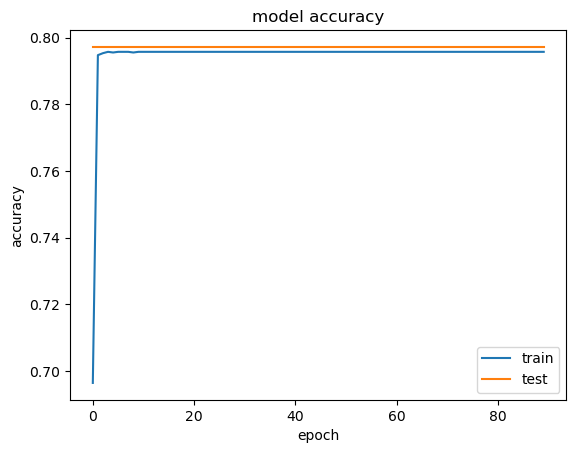

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

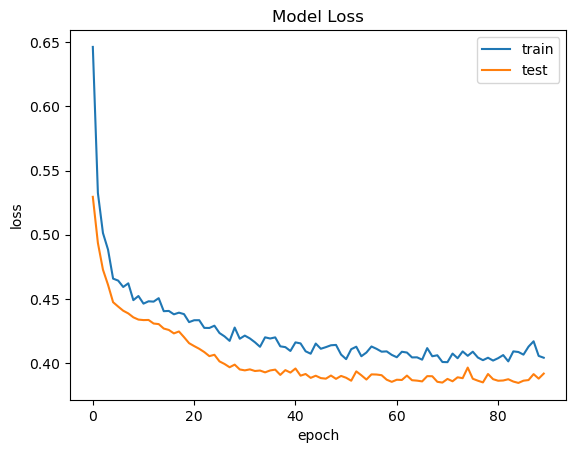

In [40]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [41]:
y_pred  =  classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

79/79 [==============================] - 0s 1ms/step


In [42]:
#confusion matric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [43]:
cm

array([[1991,    0],
       [ 509,    0]])

In [44]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.7964

In [45]:
#get the weights
classifier.get_weights()

[array([[-1.00455038e-01,  2.22154915e-01,  4.86902818e-02,
         -1.07860141e-01, -4.35723215e-02,  2.57547721e-02,
          6.12193048e-02, -1.35693744e-01,  9.56853479e-02,
          1.73479766e-01,  1.54530536e-02],
        [-6.76132321e-01, -8.87972951e-01, -9.24605727e-01,
         -7.01925933e-01, -2.12892696e-01,  3.60534459e-01,
          2.90584681e-03,  2.02308401e-01,  2.58849531e-01,
         -3.79001439e-01, -8.57519805e-01],
        [ 4.65510845e-01, -1.09838136e-02, -4.56758440e-02,
          8.48774016e-02, -2.83702277e-02,  1.90515056e-01,
          7.96487927e-03, -1.71080362e-02,  1.52696088e-01,
          8.56205672e-02, -2.28009820e-02],
        [-3.87080699e-01, -2.82598138e-01, -1.03413552e-01,
         -1.67018309e-01,  6.99841231e-02, -1.32924229e-01,
         -9.84710693e-01, -7.66348958e-01, -4.91195321e-01,
         -6.44245863e-01, -2.61479884e-01],
        [ 6.21166714e-02,  2.74134744e-02,  1.25226736e-01,
          8.79700407e-02,  8.92883301e-01, -

In [46]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.7964